In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt 

In [2]:
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

In [3]:
X.shape

(1000, 4)

In [4]:
X

array([[ 1.91518414,  1.14995454, -1.52847073,  0.79430654],
       [ 1.4685668 ,  0.80644722, -1.04912964,  0.74652026],
       [ 1.47102089,  0.90060386, -1.20228498,  0.57845433],
       ...,
       [-2.14648492, -0.24693238,  0.01337634, -2.79100527],
       [-2.62889557, -1.18505478,  1.45623708, -1.80807547],
       [ 0.50047097,  0.81763526, -1.24302955, -0.73584899]])

In [5]:
y.shape

(1000,)

In [6]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [7]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
trainX.shape

(700, 4)

In [9]:
testX.shape

(300, 4)

In [10]:
trainy.shape

(700,)

In [11]:
testy.shape

(300,)

In [12]:
model = KNeighborsClassifier(n_neighbors=3)

In [13]:
model.fit(trainX, trainy)

KNeighborsClassifier(n_neighbors=3)

In [63]:
P = model.predict_proba(testX)

In [64]:
P.shape

(300, 2)

<center><img src="roc.png"> </center>

In [65]:
auc = roc_auc_score(testy, P[:,1])

In [66]:
auc

0.8768235189468065

In [67]:
fpr, tpr, thresholds = roc_curve(testy, P[:, 1])

In [68]:
fpr

array([0.        , 0.09090909, 0.18831169, 0.38961039, 1.        ])

In [69]:
tpr

array([0.        , 0.65753425, 0.8630137 , 0.93835616, 1.        ])

In [70]:
thresholds

array([2.        , 1.        , 0.66666667, 0.33333333, 0.        ])

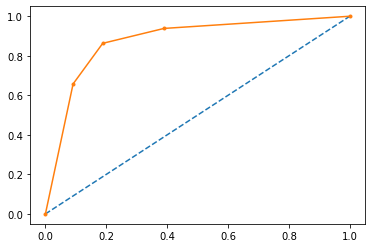

In [71]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')